Back to the main [Index](../index.ipynb)

### Simple Example

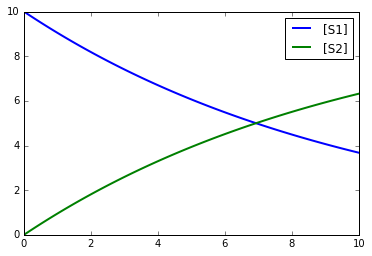

In [14]:
%matplotlib inline
from __future__ import print_function
import tellurium as te
r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 10')
r.simulate(0, 10, 100)
r.plot()

### Complex Example

In [1]:
import tellurium as te
r = te.loada('''
    # A dollar symbol means fix the species concentration
    J1: $S1 -> S2;  k1*S1; 
    J2: S2 -> S3;  k2*S2 - k3*S3;
    J3: S3 -> $S4; k4*S3;

    k1 = 0.1; k2 = 0.5; k3 = 0.5; k4 = 0.5;
    S1 = 10;
''')

result = r.simulate (0, 10, 100, ['time', 'S1', 'S2', 'S3', 'J1'])
r.plot(result);